<a href="https://colab.research.google.com/github/anamilanezi/ebac-dados/blob/main/exercicios/em13-data-wrangling-II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados** 

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [1]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

with open(NOME_ARQUIVO_FONTE) as xml:
  fonte = BeautifulSoup(xml, "lxml")


In [2]:
# visualize os resultados

fonte

<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

In [3]:
# manipule os dados
estados = fonte.find_all("nome")
estados = [estado.string for estado in estados]

siglas = fonte.find_all("sigla")
siglas = [sigla.string for sigla in siglas]

regioes = fonte.find_all("regiao")
regioes = [regiao.string for regiao in regioes]

In [4]:
print(estados)
print(siglas)
print(regioes)

['ACRE', 'ALAGOAS', 'AMAPA', 'AMAZONAS', 'BAHIA', 'CEARA', 'DISTRITO FEDERAL', 'ESPIRITO SANTO', 'GOIAS', 'MARANHAO', 'MATO GROSSO', 'MATO GROSSO DO SUL', 'PARA', 'PARAIBA', 'PARANA', 'PERNAMBUCO', 'PIAUI', 'RIO DE JANEIRO', 'RIO GRANDE DO NORTE', 'RIO GRANDE DO SUL', 'RONDONIA', 'RORAIMA', 'SANTA CATARINA', 'SAO PAULO', 'SERGIPE', 'TOCANTINS', 'MINAS GERAIS']
['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO', 'MG']
['NORTE', 'NORDESTE', 'NORTE', 'NORTE', 'NORDESTE', 'NORDESTE', 'CENTRO-OESTE', 'SUDESTE', 'CENTRO-OESTE', 'NORDESTE', 'CENTRO-OESTE', 'CENTRO-OESTE', 'NORTE', 'NORDESTE', 'SUL', 'NORDESTE', 'NORDESTE', 'SUDESTE', 'NORDESTE', 'SUL', 'NORTE', 'NORTE', 'SUL', 'SUDESTE', 'NORDESTE', 'NORTE', 'SUDESTE']


In [41]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;
import pandas as pd

NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'

estados_dic = {
    "estado": estados,
    "sigla": siglas,
    "regiao": regioes,
}
estados_df = pd.DataFrame(estados_dic)

estados_df.to_csv(NOME_ARQUIVO_DESTINO, index=False, sep=";")


### **1.2. Cidades** 

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [6]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'

fonte = pd.read_csv(NOME_ARQUIVO_FONTE)

In [39]:
# visualize os resultados
fonte.head()

,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...


In [37]:
fonte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5566 entries, 0 to 5565
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FID            5566 non-null   object 
 1   gid            5566 non-null   int64  
 2   UF             5566 non-null   object 
 3   nome           5565 non-null   object 
 4   Censo          5560 non-null   float64
 5   PIB            5566 non-null   float64
 6   Pop_est_2009   5566 non-null   int64  
 7   PIB_percapita  5566 non-null   float64
 8   Descrição      5566 non-null   object 
 9   legenda        5566 non-null   object 
 10  classe         5566 non-null   int64  
 11  geom           5566 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 521.9+ KB


In [25]:
fonte.describe().T

,count,mean,std,min,25%,50%,75%,max
gid,5566.0,2785.319080,1.607194e+03,1.000000,1394.250000,2785.500000,4176.750000,5.568000e+03
Censo,5560.0,2009.997302,8.993165e-02,2007.000000,2010.000000,2010.000000,2010.000000,2.010000e+03
PIB,5566.0,582020.311925,6.345809e+06,5770.282227,38428.172852,80591.722656,206276.042969,3.893172e+08
Pop_est_2009,5566.0,34405.572763,2.017854e+05,837.000000,5339.250000,11203.000000,23252.750000,1.103759e+07
PIB_percapita,5566.0,10977.027151,1.214959e+04,1929.969971,4517.802368,8393.169922,13314.827637,3.608158e+05
classe,5566.0,1.521380,6.711827e-01,1.000000,1.000000,1.000000,2.000000,5.000000e+00


In [9]:
# Extraindo as colunas de interesse correspondente ao Censo de 2010
cidades_df = fonte.query('Censo == 2010')[['UF', 'nome', 'Pop_est_2009', 'PIB', 'PIB_percapita']]

In [14]:
# Renomear nome das colunas
cidades_df = cidades_df.rename(columns={"UF": "estado", "nome": "cidade", "Pop_est_2009": "populacao", "PIB": "pib", "PIB_percapita": "pib_percapita"})

In [211]:
cidades_df.head()

,estado,cidade,populacao,pib,pib_percapita
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990
1,RIO GRANDE DO SUL,Turucu,4000,4.572388e+04,11430.969727
2,ESPIRITO SANTO,Vitoria,320156,1.978263e+07,61790.589844
3,MINAS GERAIS,Jacutinga,21424,2.478160e+05,11567.209961
4,PIAUI,Nazaria,7895,2.095138e+04,2653.750000


In [26]:
cidades_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5555 entries, 0 to 5565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   estado         5555 non-null   object 
 1   cidade         5555 non-null   object 
 2   populacao      5555 non-null   int64  
 3   pib            5555 non-null   float64
 4   pib_percapita  5555 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 389.4+ KB


In [75]:
# Adicionei essa etapa de remoção de acentuação para facilitar a combinação dos dataframes no próximo exercício:

cols = cidades_df.select_dtypes(include=[object]).columns
cidades_df[cols] = cidades_df[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))


In [76]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'

cidades_df.to_csv(NOME_ARQUIVO_DESTINO, sep=";", index=False)

### **1.3. Brasil** 

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-bruto.csv` com os dados do arquivo `cidades-bruto.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [78]:
brasil_df = pd.merge(left=cidades_df, right=estados_df, on='estado', how='inner')

In [79]:
# Confirmando se não existe valores nulos no DF
brasil_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5555 entries, 0 to 5554
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   estado         5555 non-null   object 
 1   cidade         5555 non-null   object 
 2   populacao      5555 non-null   int64  
 3   pib            5555 non-null   float64
 4   pib_percapita  5555 non-null   float64
 5   sigla          5555 non-null   object 
 6   regiao         5555 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 347.2+ KB


---

In [84]:
NOME_ARQUIVO_DESTINO = 'brasil.csv'

brasil_df.to_csv(NOME_ARQUIVO_DESTINO, sep=";", index=False)

## 2\. Data Analytics

### **2.1. DataFrame** 

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [103]:
brasil_df = pd.read_csv('brasil.csv', sep=";")

In [104]:
brasil_df

,estado,cidade,populacao,pib,pib_percapita,sigla,regiao
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990,BA,NORDESTE
1,BAHIA,Maetinga,7884,2.355845e+04,2988.129883,BA,NORDESTE
2,BAHIA,Ibirapua,7893,7.499741e+04,9501.759766,BA,NORDESTE
3,BAHIA,Governador Mangabeira,20668,9.290382e+04,4495.060059,BA,NORDESTE
4,BAHIA,Ibitita,19410,6.236689e+04,3213.129883,BA,NORDESTE
...,...,...,...,...,...,...,...
5550,AMAPA,Serra do Navio,3982,1.097953e+05,27572.900391,AP,NORTE
5551,AMAPA,Ferreira Gomes,5475,6.993773e+04,12774.009766,AP,NORTE
5552,AMAPA,Tartarugalzinho,13769,1.199880e+05,8714.360352,AP,NORTE
5553,AMAPA,Macapa,366484,4.679694e+06,12769.160156,AP,NORTE


### **2.2. Analise** 

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [105]:
mais_populosas = brasil_df.sort_values(by=['populacao'], ascending=False,)
mais_populosas[0:9]

,estado,cidade,populacao,pib,pib_percapita,sigla,regiao
3271,SAO PAULO,Sao Paulo,11037593,389317152.0,35271.929688,SP,SUDESTE
4504,RIO DE JANEIRO,Rio de Janeiro,6186710,175739344.0,28405.949219,RJ,SUDESTE
44,BAHIA,Salvador,2998056,32824228.0,10948.500000,BA,NORDESTE
5554,DISTRITO FEDERAL,Brasilia,2606885,131487264.0,50438.460938,DF,CENTRO-OESTE
4221,CEARA,Fortaleza,2505552,31789186.0,12687.500000,CE,NORDESTE
1735,MINAS GERAIS,Belo Horizonte,2452617,44595204.0,18182.699219,MG,SUDESTE
4849,PARANA,Curitiba,1851215,45762420.0,24720.210938,PR,SUL
3720,AMAZONAS,Manaus,1738641,40486108.0,23286.060547,AM,NORTE
2435,PERNAMBUCO,Recife,1561659,24835340.0,15903.179688,PE,NORDESTE


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [119]:
menores_pib_nordeste = brasil_df.query("regiao == 'NORDESTE'").sort_values(by=['pib_percapita'], ascending=True)
menores_pib_nordeste.head(5)

,estado,cidade,populacao,pib,pib_percapita,sigla,regiao
4464,MARANHAO,Sao Vicente Ferrer,20463,39492.960938,1929.969971,MA,NORDESTE
4359,MARANHAO,Cajapio,10337,22781.035156,2203.830078,MA,NORDESTE
1848,PIAUI,Dom Inocencio,10795,25457.230469,2358.239990,PI,NORDESTE
4483,MARANHAO,Timbiras,26909,63724.851562,2368.159912,MA,NORDESTE
4380,MARANHAO,Axixa,15203,36745.226562,2416.969971,MA,NORDESTE


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [210]:
maiores_pib_sp = brasil_df.query('sigla == "SP"').sort_values(by=['pib'], ascending=False)
maiores_pib_sp[['cidade', 'pib']].head(15)

,cidade,pib
3271,Sao Paulo,389317152.0
3223,Guarulhos,32473828.0
3340,Campinas,31654720.0
3106,Osasco,31616452.0
2810,Sao Bernardo do Campo,28935768.0
3344,Barueri,26908070.0
2768,Santos,22546134.0
2994,Sao Jose dos Campos,22018042.0
3014,Jundiai,16585137.0
2816,Santo Andre,14709603.0


 - Qual é o PIB do estado de Santa Catarina?

In [138]:
brasil_df.query("sigla == 'SC'")['pib'].agg("sum")

129806256.75195317

 - Qual é o população da região sul?

In [137]:
populacao_sul = brasil_df.query("regiao == 'SUL'")["populacao"].agg("sum")
populacao_sul

27719118

 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [145]:
media_pib_percapita_MS = brasil_df.query("sigla == 'MS'")["pib_percapita"].agg("mean")
media_pib_percapita_MS


14458.896859975644

 - Qual é a população do Brasil?

In [147]:
pop_brasil = brasil_df['populacao'].agg("sum")
pop_brasil

191176146

### **2.3. Visualização** 

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

In [154]:
# cidades_menos_populosas = brasil_df.sort_values(by=['populacao'], ascending=True)
# cidades_menos_populosas = cidades_menos_populosas[['cidade', 'estado', 'populacao']].head(10)
cidades_menos_populosas = brasil_df[['cidade', 'estado', 'populacao']].sort_values(by=['populacao'], ascending=True).head(10)


In [155]:
cidades_menos_populosas

,cidade,estado,populacao
3224,Bora,SAO PAULO,837
1485,Serra da Saudade,MINAS GERAIS,890
2283,Anhanguera,GOIAS,1018
4673,Araguainha,MATO GROSSO,1115
3247,Nova Castilho,SAO PAULO,1122
3580,Oliveira de Fatima,TOCANTINS,1129
1939,Miguel Leao,PIAUI,1212
995,Cedro do Abaete,MINAS GERAIS,1221
3531,Parari,PARAIBA,1266
3614,Chapada de Areia,TOCANTINS,1273


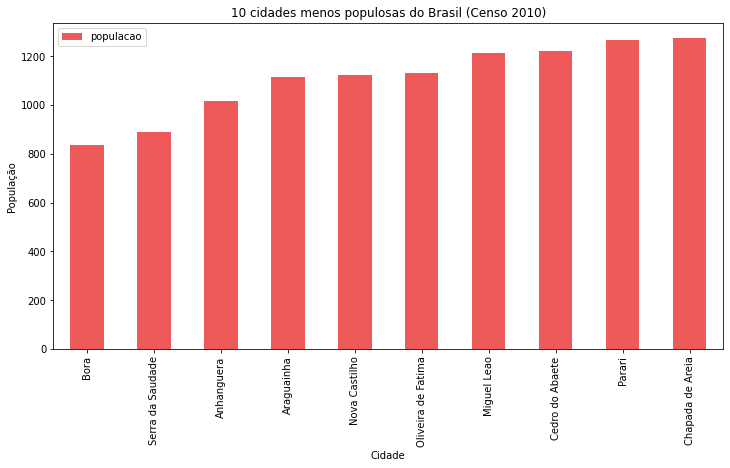

In [208]:
cidades_menos_populosas.plot.bar(x="cidade", 
                                 y="populacao",
                                 figsize=(12, 6), 
                                 ylabel="População",
                                 xlabel="Cidade",
                                 title="10 cidades menos populosas do Brasil (Censo 2010)",
                                 legend=True,
                                 color="#ee5a5a")





 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

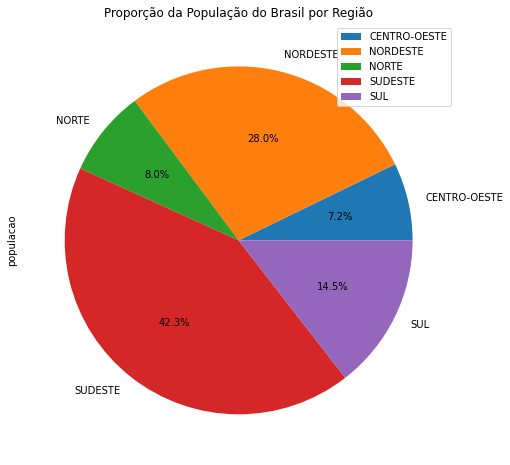

In [209]:
populacao_por_regiao = brasil_df[["regiao", "populacao"]].groupby("regiao").agg("sum")
populacao_por_regiao.plot.pie(y='populacao',
                              title="Proporção da População do Brasil por Região",
                              figsize=(16,8),
                              autopct='%1.1f%%'
                              )